## 1) Daten aus CSV-Datei auslesen

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import os
import csv
# import tensorflow as tf

########## Input ##########

data_path = 'F:\\data\\'
samples_per_class = 1000


########## Program ##########

# Listen mit den flux Werten, Labels und Wellenlängen erstellen
data = np.zeros(shape=(4000,3522))
labels = np.zeros(shape=(4000,), dtype='int')
wavelengths = np.zeros(shape=(3522,))

# Daten in numpy arrays data und labels einlesen
i=0
file = open(data_path + 'spectral_data.csv', 'r') 

with file:
    reader = csv.reader(file, delimiter=',')  
    header_row = next(reader)  
    
    for row in reader:
        wavelengths[reader.line_num-2] = row[0]
        
        for t in range(4000):
            data[t][i] = row[t+1]    
        i += 1
    file.close()

# Labels in die Liste labels eintragen
for i in range(4):
    for t in range(samples_per_class):
        labels[i*1000+t] = i
        
#         if i==0:
#             labels[i*1000+t] = 0 #AGN
#         if i==1:
#             labels[i*1000+t] = 1 #galaxy
#         if i==2:
#             labels[i*1000+t] = 2 #QSO
#         if i==3:
#             labels[i*1000+t] = 3 #star

In [2]:
print(labels[2345])

2


## 2) Normierung

In [2]:
data_normalized = np.zeros(shape=(4000,3522))

# Normierungs-Test: median normalization
for i in range(len(data)):
    sorted = np.sort(data[i])
    median = 0.5* (data[i][1760] + data[i][1761])
    data_normalized[i] = data[i]/median
    print(median)

16.179667472839355
42.20051193237305
17.748315811157227
9.19969129562378
12.269596576690674
12.973103046417236
21.66347312927246
22.901838302612305
12.559422969818115
44.92007064819336
18.614689826965332
8.853373050689697
24.177111625671387
34.91410255432129
10.746444702148438
21.19770908355713
35.54086875915527
103.75865173339844
12.965654373168945
13.001865863800049
14.908455848693848
4.746089220046997
14.113614082336426
10.209070205688477
26.923468589782715
14.515521049499512
14.002418518066406
23.776065826416016
2.1854971647262573
8.803476810455322
46.82707977294922
8.858650922775269
18.411810874938965
46.64634895324707
50.88409233093262
28.802475929260254
9.963847160339355
12.296740055084229
9.55416488647461
12.542832851409912
24.881152153015137
8.139135360717773
18.700186729431152
18.286967277526855
5.48815393447876
10.949926376342773
9.557592391967773
7.637289047241211
9.393391609191895
18.810725212097168
9.176909923553467
8.544039249420166
13.391618251800537
19.244847297668457


16.277216911315918
13.890795230865479
14.955893993377686
35.5169563293457
23.674999237060547
19.79776382446289
27.9743709564209
13.380921363830566
5.4437384605407715
10.53175687789917
18.50569438934326
23.35031795501709
5.363965749740601
12.88236141204834
17.23132610321045
11.213523864746094
86.01932907104492
8.510063171386719
11.931522846221924
10.110933780670166
21.353611946105957
16.006554126739502
24.003872871398926
12.75200605392456
10.995520114898682
19.06363582611084
16.920117378234863
24.084086418151855
32.357444763183594
6.685210227966309
38.8038330078125
71.61026763916016
22.610697746276855
7.699950933456421
12.70303201675415
8.749386310577393
24.80366039276123
22.288424491882324
15.752676010131836
27.83664608001709
44.58573532104492
2.9165709018707275
6.488754749298096
4.515101432800293
16.31344509124756
8.225658416748047
23.703292846679688
9.649904727935791
12.916906356811523
22.1044282913208
41.161285400390625
16.01791286468506
16.636104106903076
20.050437927246094
13.8515

C:\Users\Josh\AppData\Local\Temp/ipykernel_17196/156693553.py:7: RuntimeWarning: invalid value encountered in true_divide
  data_normalized[i] = data[i]/median


10.524595737457275
9.757744312286377
7.089643955230713
5.467851161956787
21.77565574645996
1.8540238738059998
12.085424900054932
12.012372493743896
5.02699089050293
15.655935287475586
18.25210666656494
12.915797233581543
10.447818756103516
12.920984268188477
16.97879123687744
43.62714767456055
12.33630895614624
1.8671159744262695
12.982756614685059
11.749863147735596
10.73812198638916
13.564367294311523
7.1416356563568115
18.702709197998047
99.21485900878906
15.45622730255127
18.268183708190918
17.244624137878418
12.131161212921143
11.032380104064941
11.79551362991333
6.64395546913147
14.295250415802002
25.42058277130127
27.154205322265625
10.910183429718018
2.1725471019744873
10.396693229675293
13.692945957183838
15.61100435256958
18.918417930603027
9.021684646606445
6.892775058746338
17.907459259033203
12.435016632080078
9.146388053894043
21.161824226379395
3.0692394971847534
2.802018404006958
0.0
1.4458377361297607
5.449625492095947
1.933674305677414
4.7512195110321045
2.87106072902

0.10773324081674218
0.22987407445907593
0.2133658453822136
-0.2218516767024994
-0.5831399857997894
-0.8054011166095734
15.885462760925293
1.8530235886573792
0.06585299223661423
3.1253702640533447
-0.11739114671945572
7.102042198181152
1.6615409851074219
0.42545361816883087
0.09346944652497768
0.9461767077445984
7.827390193939209
10.853666305541992
8.908037662506104
6.59323525428772
8.71268892288208
13.961307048797607
-0.34842073172330856
2.344458222389221
0.34311624616384506
-0.4332037419080734
5.769068479537964
0.5423099398612976
3.567609667778015
23.239635467529297
9.284517288208008
16.095812797546387
4.630233526229858
84.11706924438477
7.191220045089722
9.787798404693604
10.261419773101807
240.05722045898438
0.3111072778701782
0.11113769188523293
5.796403408050537
14.973011493682861
6.591747760772705
-0.4400075227022171
13.007765769958496
-1.0174474120140076
5.321437835693359
1.3084709346294403
16.910205841064453
4.364035606384277
0.01569965109229088
-0.32843586802482605
5.916874170

19.745994567871094
4.350183963775635
25.92826557159424
7.783823490142822
10.191526412963867
75.74108123779297
10.086424827575684
11.42553186416626
20.784467697143555
39.534976959228516
11.229723453521729
223.40181732177734
15.150890350341797
33.10568428039551
64.65296936035156
0.22923290729522705
3.796600103378296
5.346182823181152
5.011366844177246
22.018004417419434
6.363740682601929
5.661109924316406
0.021656006574630737
0.10126528330147266
5.282713413238525
-0.32883618772029877
-0.16267096996307373
252.77439880371094
7.242211580276489
8.975423336029053
27.248193740844727
22.54263401031494
3.6952098608016968
12.047062873840332
33.63005447387695
328.5156555175781
59.37113952636719
33.075178146362305
14.059668064117432
0.15266000479459763
147.18091583251953
9.37417221069336
132.89064025878906
0.3614773117005825
57.34269714355469
-10.817360162734985
0.19118458032608032
4.5354673862457275
54.679988861083984
128.69183349609375
169.96861267089844
1.9149212837219238
9.051176071166992
25.65

**Ohne Normierung**

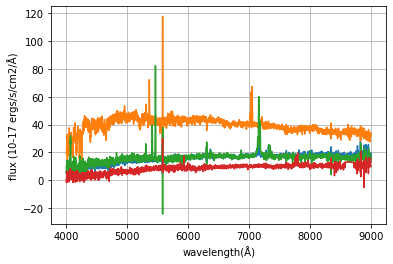

In [3]:
for i in range(4): 
    plt.plot(wavelengths, data[i]) 
    plt.xlabel('wavelength(Å)') 
    plt.ylabel('flux (10-17 ergs/s/cm2/Å)') 
    plt.grid(True) 

**Mit Normierung**

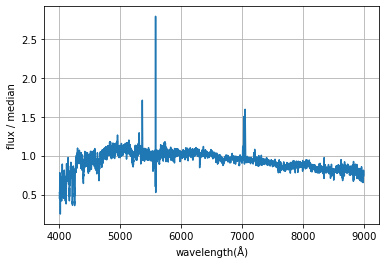

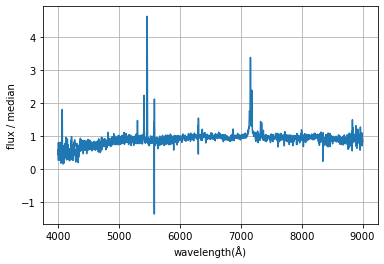

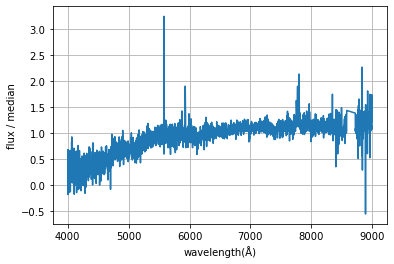

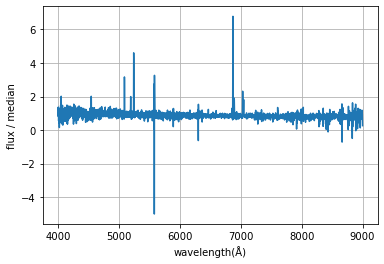

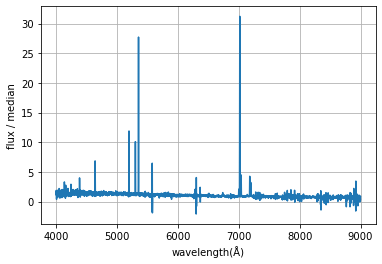

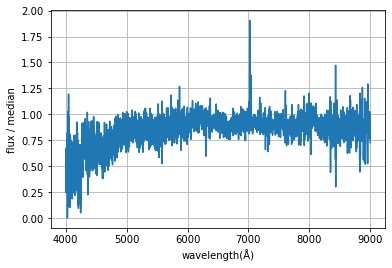

In [4]:
for i in [1,2,3,1001,1002,1003]:
    plt.plot(wavelengths, data_normalized[i]) 
    plt.xlabel('wavelength(Å)') 
    plt.ylabel('flux / median') 
    plt.grid(True)
    plt.show()

## 3) Trainings- und Test-Datensatz erstellen

In [192]:
import random
# z = list(zip(data_normalized, labels)) # Mit Median-Normierung
z = list(zip(data, labels)) # Ohne Median-Normierung
random.shuffle(z)
data_shuffled, labels_shuffled = zip(*z)

In [193]:
print(np.array(data_shuffled).shape)
print(np.array(labels_shuffled).shape)

(4000, 3522)
(4000,)


In [194]:
split_index = int(len(data_shuffled)*0.9)

# Daten
data_training = data_shuffled[:split_index]
data_test = data_shuffled[split_index:]

# Labels
labels_training = labels_shuffled[:split_index]
labels_test = labels_shuffled[split_index:]

In [195]:
data_training = np.asarray(data_training)
data_test = np.asarray(data_test)

labels_training = np.asarray(labels_training)
labels_test = np.asarray(labels_test)

print(data_training.shape)
print(data_test.shape)

print(labels_training.shape)
print(labels_test.shape)

(3600, 3522)
(400, 3522)
(3600,)
(400,)


## 4) Netzwerk erstellen

In [196]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout, InputLayer, GlobalAveragePooling1D
from tensorflow.keras.metrics import Accuracy

from tensorflow import keras
from tensorflow.keras import layers

In [197]:
input_shape = (3522,1)

data_training_r = np.reshape(data_training, newshape=(len(data_training), input_shape[0], input_shape[1]))
data_test_r  = np.reshape(data_test, newshape=(len(data_test), input_shape[0], input_shape[1]))

In [198]:
print(data_training_r.shape)
print(data_test_r.shape)

(3600, 3522, 1)
(400, 3522, 1)


In [280]:
# Conv1D, maxPool1D, categorical_crossentropy
# model = Sequential([
#     #Conv1D(filters=30, kernel_size=10, activation='relu', input_shape=(3522,1)),
#     Conv1D(filters=64, kernel_size=5, activation='relu'), #mehr Filtern
#     MaxPooling1D(4), # Größere Region
#     Dropout(0.1),
#     #Conv1D(filters=60, kernel_size=10, activation='relu'),
#     Conv1D(filters=64, kernel_size=5, activation='relu'),
#     MaxPooling1D(4),
#     # GlobalAveragePooling1D(),
#     Dropout(0.1),
#     Flatten(),
    
#     Dense(units=64, activation='relu'),
#     #Extra Dense
    
#     Dense(units=4, activation='softmax')
# ])

# model = Sequential([
#     Conv1D(filters=64, kernel_size=80, strides=10, activation='relu', input_shape=(3522,1)), # stride
#     #MaxPooling1D(3),
#     Dropout(0.35),
#     Conv1D(filters=128, kernel_size=40, strides=10, activation='relu'),
#     MaxPooling1D(3),
#     Dropout(0.35),
#     Flatten(),
#     Dense(units=128, activation='relu'), # Droput, weniger neuronen
#     Dropout(0.35),
#     Dense(units=4, activation='softmax')
# ])

model = Sequential([
    Conv1D(filters=64, kernel_size=40, strides=10, activation='relu', input_shape=(3522,1)), # stride
    Dropout(0.2),
    Conv1D(filters=128, kernel_size=20, strides=5, activation='relu'), # stride
    Dropout(0.2),
    Flatten(),
    Dense(units=4, activation='softmax')
])

In [281]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [282]:
x_train = data_training_r
x_test = data_test_r

# x_train = tf.keras.utils.normalize(data_training_r, axis=1)
# x_test = tf.keras.utils.normalize(data_test_r, axis=1)

y_train = labels_training
y_test = labels_test

In [283]:
history = model.fit(x_train, y_train,
                    epochs=100, validation_split=0.1,
                    shuffle=True, batch_size=200,
                    verbose=1)

model.save('network_h5\spectral_classifier_v2.h5')

Epoch 1/100
17/17 [==============================] - 2s 112ms/step - loss: 2.0856 - accuracy: 0.3256 - val_loss: 1.2606 - val_accuracy: 0.3806
Epoch 2/100
17/17 [==============================] - 2s 104ms/step - loss: 1.2148 - accuracy: 0.4333 - val_loss: 1.1641 - val_accuracy: 0.4667
Epoch 3/100
17/17 [==============================] - 2s 104ms/step - loss: 1.1089 - accuracy: 0.5352 - val_loss: 1.1137 - val_accuracy: 0.4778
Epoch 4/100
17/17 [==============================] - 2s 104ms/step - loss: 1.0981 - accuracy: 0.5426 - val_loss: 0.9655 - val_accuracy: 0.6583
Epoch 5/100
17/17 [==============================] - 2s 105ms/step - loss: 0.9724 - accuracy: 0.6336 - val_loss: 1.0990 - val_accuracy: 0.5472
Epoch 6/100
17/17 [==============================] - 2s 105ms/step - loss: 0.9519 - accuracy: 0.6404 - val_loss: 0.9050 - val_accuracy: 0.6583
Epoch 7/100
17/17 [==============================] - 2s 105ms/step - loss: 0.9087 - accuracy: 0.6593 - val_loss: 0.8785 - val_accuracy: 0.6972

Epoch 58/100
17/17 [==============================] - 2s 106ms/step - loss: 0.2458 - accuracy: 0.9336 - val_loss: 1.1163 - val_accuracy: 0.7889
Epoch 59/100
17/17 [==============================] - 2s 107ms/step - loss: 0.1713 - accuracy: 0.9491 - val_loss: 1.2440 - val_accuracy: 0.7611
Epoch 60/100
17/17 [==============================] - 2s 106ms/step - loss: 0.1614 - accuracy: 0.9522 - val_loss: 1.2123 - val_accuracy: 0.7750
Epoch 61/100
17/17 [==============================] - 2s 107ms/step - loss: 0.1360 - accuracy: 0.9596 - val_loss: 1.1881 - val_accuracy: 0.7639
Epoch 62/100
17/17 [==============================] - 2s 110ms/step - loss: 0.1316 - accuracy: 0.9617 - val_loss: 1.1149 - val_accuracy: 0.8000
Epoch 63/100
17/17 [==============================] - 2s 112ms/step - loss: 0.1081 - accuracy: 0.9698 - val_loss: 1.1906 - val_accuracy: 0.7944
Epoch 64/100
17/17 [==============================] - 2s 111ms/step - loss: 0.1579 - accuracy: 0.9512 - val_loss: 1.2332 - val_accuracy:

## 5) Auswertungen

In [28]:
def plot_accuracy(name, ylim=[0,1.01]):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.ylim(ylim[0], ylim[1])
    plt.legend(['training', 'validation'], loc='upper left')
    plt.savefig(name)
    plt.show()

In [29]:
def plot_loss(name, ylim=[-0.5,2]):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim(ylim[0],ylim[1])
    plt.legend(['training', 'validation'], loc='upper left')
    plt.savefig(name)
    plt.show()


In [30]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    Diese Funktion printet und plottet die Confusion Matrix
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normierte Confusion Matrix")
    else:
        print("Confusion Matrix ohne Normierung")
        
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

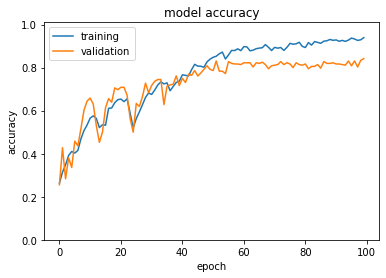

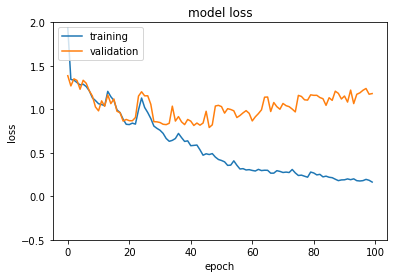

In [275]:
plot_accuracy("accuracy_graph_v2.png")
plot_loss("loss_graph_v2.png")

In [67]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    Diese Funktion printet und plottet die Confusion Matrix
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normierte Confusion Matrix")
    else:
        print("Confusion Matrix ohne Normierung")
        
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix ohne Normierung
[[97  4  6  2]
 [40 13 39  1]
 [12  1 62 12]
 [ 3  3 58 47]]


NameError: name 'itertools' is not defined

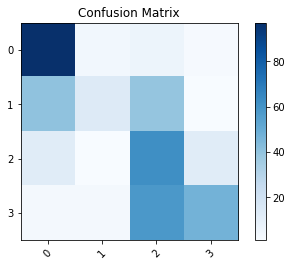

In [69]:
predictions = model.predict(x=x_test)
rounded_predictions = np.argmax(predictions, axis=-1)

cm_labels = range(4)
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

plot_confusion_matrix(cm=cm, classes=cm_labels, title='Confusion Matrix', normalize=False)

In [294]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(data_training, labels_training)
clf.score(data_test, labels_test)

0.32

In [296]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(max_iter=1000, random_state=123)
clf1.fit(data_training, labels_training)
clf1.score(data_test, labels_test)

C:\Users\Josh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6775

In [299]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=100, random_state=123)
clf2.fit(data_training, labels_training)
clf2.score(data_test, labels_test)

0.7225

In [297]:
from sklearn.naive_bayes import GaussianNB
clf3 = GaussianNB()
clf3.fit(data_training, labels_training)
clf3.score(data_test, labels_test)

0.4225